In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd


In [20]:
base = pd.read_csv("house_prices.csv")

In [21]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
x = base.iloc[:,5].values
x = x.reshape(-1,1)
y = base.iloc[:,2:3].values

In [23]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

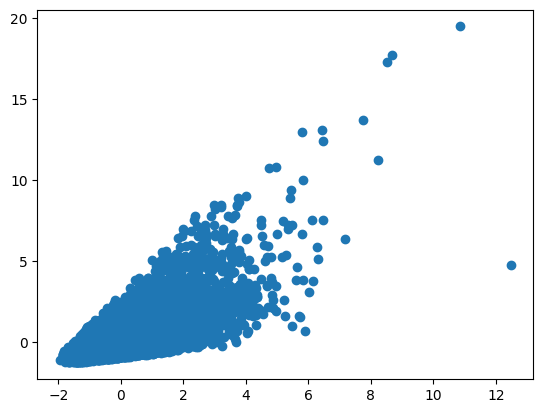

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [25]:
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [26]:
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

In [27]:
batch_size = 32
xph = tf.placeholder(tf.float32,[batch_size,1])
yph = tf.placeholder(tf.float32,[batch_size,1])

In [28]:
y_model = b0 + b1 * xph
error = tf.losses.mean_squared_error(yph,y_model)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(error)

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        indices = np.random.randint(len(x),size=batch_size)
        feed = {xph: x[indices], yph: y[indices]}
        sess.run(treinamento, feed_dict = feed)
    b0_final, b1_final = sess.run([b0,b1])

2025-01-29 16:21:47.088231: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
I0000 00:00:1738178507.091882    8612 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


In [30]:
previsoes = b0_final + b1_final * x

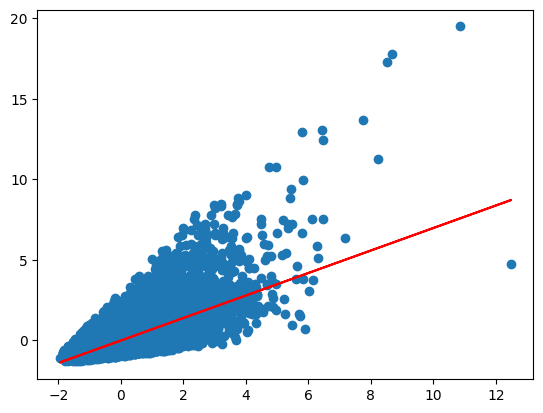

In [32]:
plt.plot(x,y,"o")
plt.plot(x,previsoes, color = 'red')
plt.show()